In [104]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
import statsmodels
import os, warnings
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
from pydlm import dlm, trend, seasonality, dynamic, autoReg
plt.rcParams['figure.figsize'] = (16,8)

In [6]:
pwd

'C:\\Users\\Hassan'

In [25]:
print(os.listdir("dataset/"))

['20160921-analysisofestimatedarrivals.xlsx']


In [94]:
#import data
MigData = 'dataset/MigrantsData.csv'
df = pd.read_csv(MigData)
df['Date'] = pd.to_datetime(dataset['Date'])
IndexedDataset = df.set_index(['Date'])
df.tail()

,Date,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
352,2016-09-17,317,164,0,0,200,0,28,0,131
353,2016-09-18,0,210,61,0,200,0,38,0,127
354,2016-09-19,47,113,34,0,200,0,30,0,111
355,2016-09-20,0,100,71,0,200,0,41,0,119
356,2016-09-21,0,107,67,0,200,0,40,0,90


In [75]:
from datetime import datetime
#IndexedDataset.head(5)

In [76]:
#df.describe()

In [85]:
#Definition for strippping whitespace
def trim(df):
    trim = lambda x: x.strip() if type(x) is str else x
    return dataset.applymap(trim)

In [90]:
df = trim(df)
IndexedDataset.head(5)

,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
Date,,,,,,,,,
2015-10-01,343,"2,631","2,409","4,370","5,900","4,344","3,667",0,"4,550"
2015-10-02,0,"4,055","1,215","5,853","3,700","5,546","4,897",0,"2,700"
2015-10-03,128,"6,097","4,480","4,202","3,700","6,086","6,056",NaN,"7,100"
2015-10-04,62,"4,763","1,513","5,181","4,250","5,065","5,925",0,"5,800"
2015-10-05,0,"5,909","7,833","4,282","3,250","6,338","5,952",0,"6,100"


In [148]:
df.shape

(351, 10)

In [150]:
df.isnull().sum()

Date                             0
Arrivals to Italy                0
Arrivals to Greek Islands        0
Departures to mainland Greece    0
Arrivals to fYRoM                0
Arrivals to Serbia               0
Arrivals to Croatia              0
Arrivals to Hungary              0
Arrivals to Slovenia             0
Arrivals to Austria              0
dtype: int64

In [151]:
df_ = df.dropna()

In [152]:
df_.shape

(351, 10)

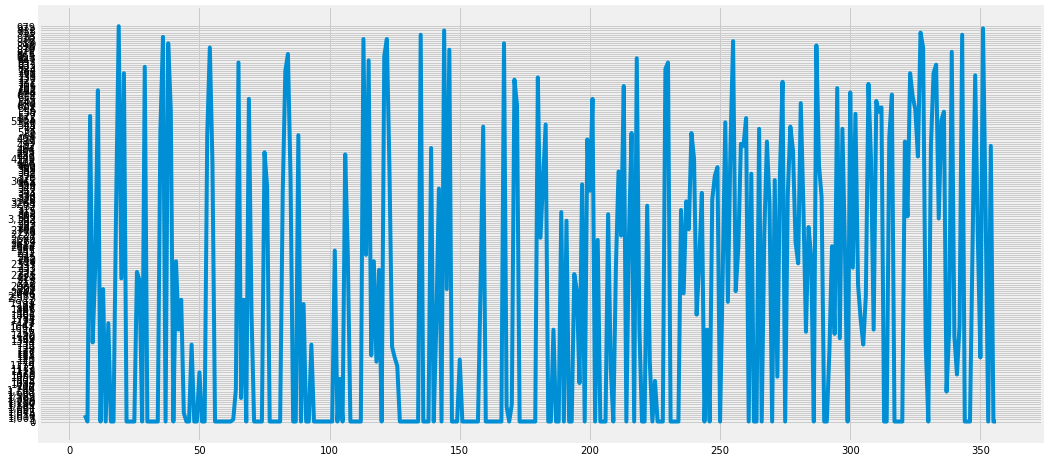

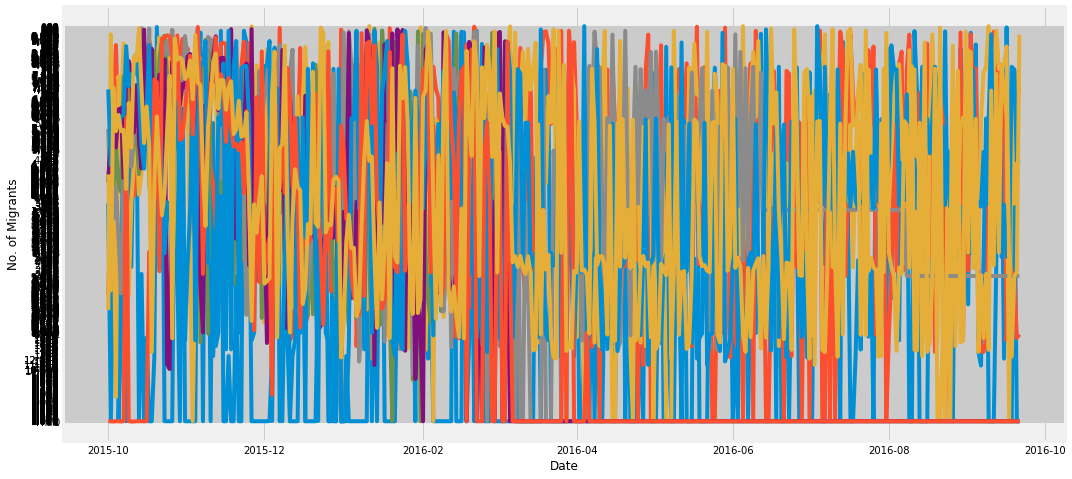

In [157]:
plt.plot(df.index, df["Arrivals to Italy"])
plt.show()
plt.xlabel("Date")
plt.ylabel("No. of Migrants")

plt.plot(IndexedDataset)

In [79]:
#Determine Rolling Statistics
rolmean = IndexedDataset.rolling(window=365).mean()

rolstd = IndexedDataset.rolling(window=365).std()
print(rolmean, rolstd)

           Arrivals to Italy Arrivals to Greek Islands  \
Date                                                     
2015-10-01               343                     2,631   
2015-10-02                 0                     4,055   
2015-10-03               128                     6,097   
2015-10-04                62                     4,763   
2015-10-05                 0                     5,909   
2015-10-06             2,001                     6,496   
2015-10-07             1,010                     3,734   
2015-10-08                 0                     4,295   
2015-10-09               572                     5,695   
2015-10-10               134                     4,045   
2015-10-11               237                     4,034   
2015-10-12               698                     4,671   
2015-10-13                 0                     6,079   
2015-10-14               207                     6,380   
2015-10-15                 0                     6,830   
2015-10-16    

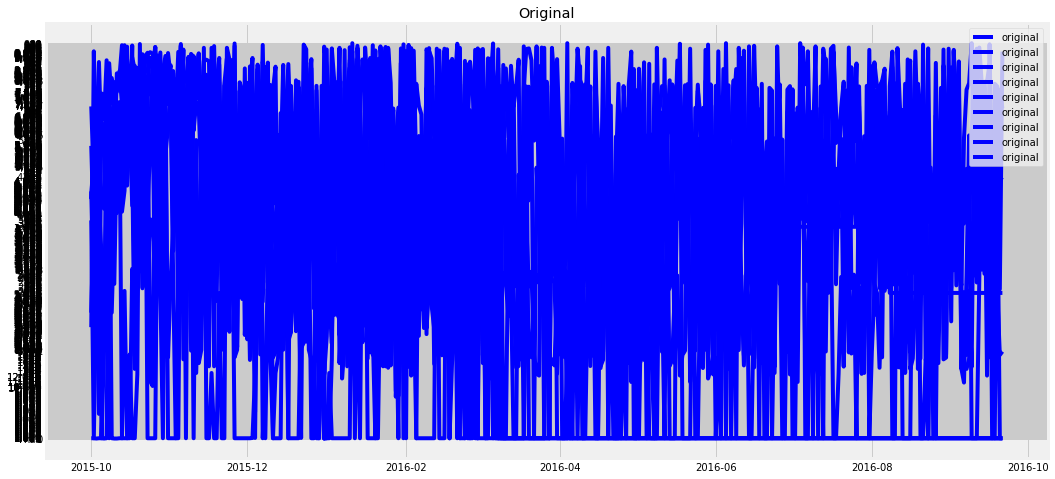

In [144]:
#plot rolling statistics
orig = plt.plot(IndexedDataset, color='blue', label='original')
plt.legend(loc = 'upper right')
plt.title("Original")
plt.show(block = False)

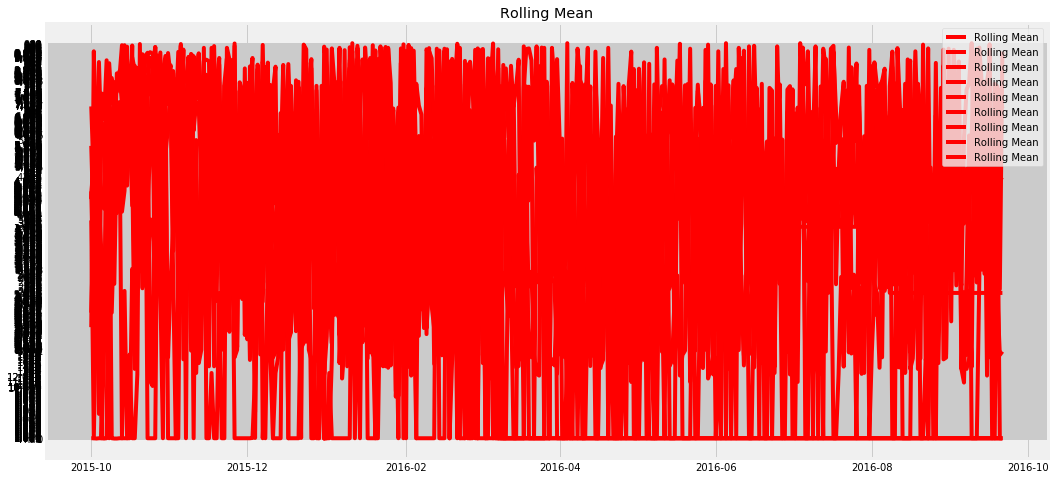

In [147]:
#plot rolling statistics
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc = 'upper right')
plt.title("Rolling Mean")
plt.show(block = False)

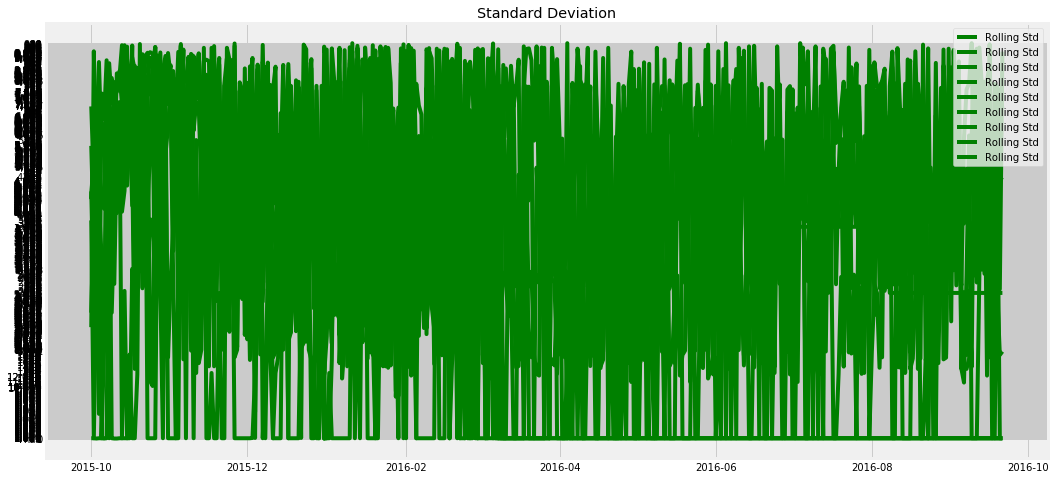

In [146]:
#plot rolling statistics
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend(loc = 'upper right')
plt.title("Standard Deviation")
plt.show(block = False)

In [136]:
df = df.iloc[1:]
df = df.fillna(method='ffill')
df.tail()

,Date,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
352,2016-09-17,317,164,0,0,200,0,28,0,131
353,2016-09-18,0,210,61,0,200,0,38,0,127
354,2016-09-19,47,113,34,0,200,0,30,0,111
355,2016-09-20,0,100,71,0,200,0,41,0,119
356,2016-09-21,0,107,67,0,200,0,40,0,90


In [137]:
df = df.fillna(method='bfill')
df.head()

,Date,Arrivals to Italy,Arrivals to Greek Islands,Departures to mainland Greece,Arrivals to fYRoM,Arrivals to Serbia,Arrivals to Croatia,Arrivals to Hungary,Arrivals to Slovenia,Arrivals to Austria
6,2015-10-07,"1,010","3,734","4,886","7,816","4,350","4,446","6,103",0,"5,861"
7,2015-10-08,0,"4,295","5,349","7,663","4,650","7,798","4,583",6,"4,229"
8,2015-10-09,572,"5,695","2,631","6,107","6,550","8,201","7,215",0,"6,700"
9,2015-10-10,134,"4,045","2,214","4,922","4,850","7,896","7,907",0,"5,050"
10,2015-10-11,237,"4,034","4,950","5,448","5,950","5,732","7,897",0,"8,540"


In [138]:
df.shape

(351, 10)

In [139]:
df = df.resample('3D').mean()
df.head()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [128]:
#Perform Dicky Duller Test
from statsmodels.tsa.stattools import adfuller

print ('Result of Dicky Fuller Test ')
dftest  = adfuller(IndexedDataset["Date"], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#Lags used', 'No. of observation used'])
for key,value in dftest[4].item():
    dfoutput['Critical Value(%s)'%key] = value
    
print(dfoutput)

Result of Dicky Fuller Test 


KeyError: 'Date'

In [135]:
## Estimated Trends 
IndexedDataset_logScaele = np.log(IndexedDataset)
plt.plot(IndexedDataset_logScaele)

AttributeError: 'str' object has no attribute 'log'